In [94]:
from matplotlib import pyplot as plt
import numpy as np
import random
import tqdm

In [175]:
N = 200000
avg_biomass_gt = 3.0
stdev_biomass_gt = 0.6
single_fish_pred_stdev_pct = 0.15
error_cutoff = 0.01


In [176]:
T = 100
sample_sizes = np.arange(100, 10000, 100)

avg_population_err_pcts = []
within_1_pct_freqs = []
for sample_size in tqdm.tqdm(sample_sizes):
    population_err_pcts = []
    within_1_pcts = []
    for i in range(T):
        biomass_vec_gt = np.random.normal(avg_biomass_gt, stdev_biomass_gt, N)
        biomass_vec_sample_gt = biomass_vec_gt[:sample_size]
        deviations = np.multiply(single_fish_pred_stdev_pct * np.random.normal(0.0, 1.0, sample_size), biomass_vec_sample_gt)
        biomass_vec_sample_pred = biomass_vec_sample_gt + deviations
        avg_biomass_pred = biomass_vec_sample_pred.mean()
        avg_biomass_gt = biomass_vec_gt.mean()
        population_err_pct = abs(avg_biomass_gt - avg_biomass_pred) / avg_biomass_pred
        within_1_pct = 1 if population_err_pct < error_cutoff else 0
        population_err_pcts.append(population_err_pct)
        within_1_pcts.append(within_1_pct)
        
    population_err_pcts = np.array(population_err_pcts)
    within_1_pcts = np.array(within_1_pcts)
    avg_population_err_pct = population_err_pcts.mean()
    within_1_pct_freq = within_1_pcts.mean()
    avg_population_err_pcts.append(avg_population_err_pct)
    within_1_pct_freqs.append(within_1_pct_freq)
        
        
        
        
        


100%|██████████| 99/99 [01:03<00:00,  1.55it/s]


<h1> Results for 5% standard deviation in error </h1>

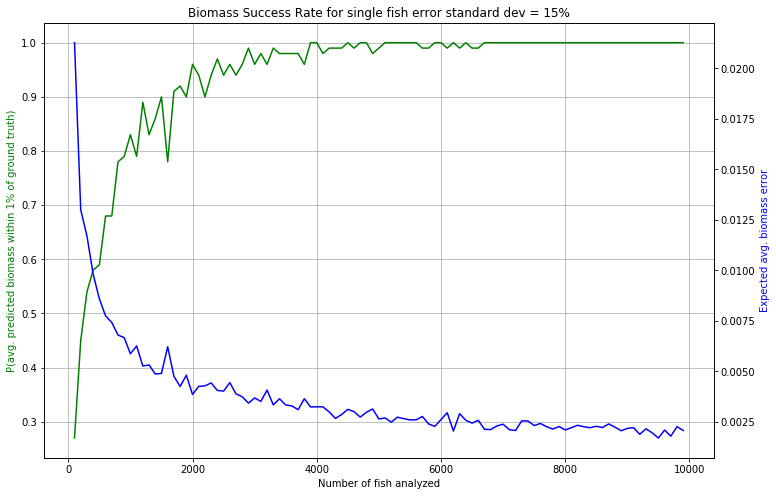

In [177]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax1.plot(sample_sizes, within_1_pct_freqs, 'g-')
ax2.plot(sample_sizes, avg_population_err_pcts, 'b-')

ax1.set_xlabel('Number of fish analyzed')
ax1.set_ylabel('P(avg. predicted biomass within {}% of ground truth)'.format(int(100 * error_cutoff)), color='g')
ax2.set_ylabel('Expected avg. biomass error', color='b')

plt.title('Biomass Success Rate for single fish error standard dev = {}%'.format(int(100 * single_fish_pred_stdev_pct)))
ax1.grid()
plt.show()

<h1> Results for 15% standard deviation error </h1>

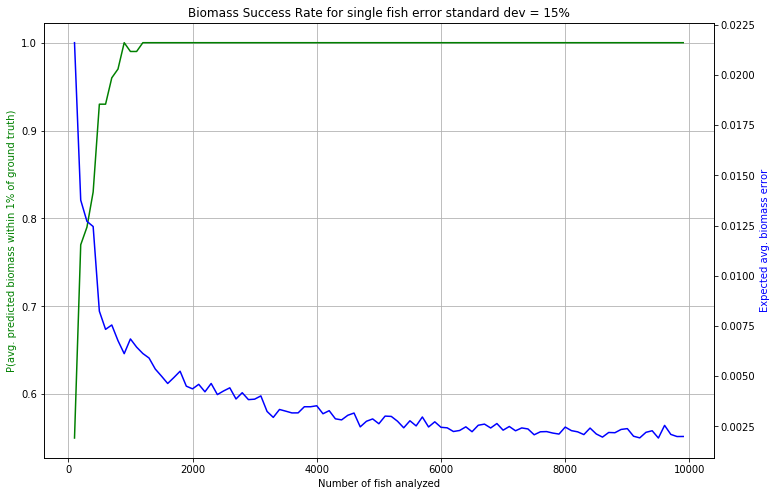

In [160]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax1.plot(sample_sizes, within_1_pct_freqs, 'g-')
ax2.plot(sample_sizes, avg_population_err_pcts, 'b-')

ax1.set_xlabel('Number of fish analyzed')
ax1.set_ylabel('P(avg. predicted biomass within 1% of ground truth)', color='g')
ax2.set_ylabel('Expected avg. biomass error', color='b')

plt.title('Biomass Success Rate for single fish error standard dev = 15%')
ax1.grid()
plt.show()

<h1> Results for perfect biomass estimator </h1>

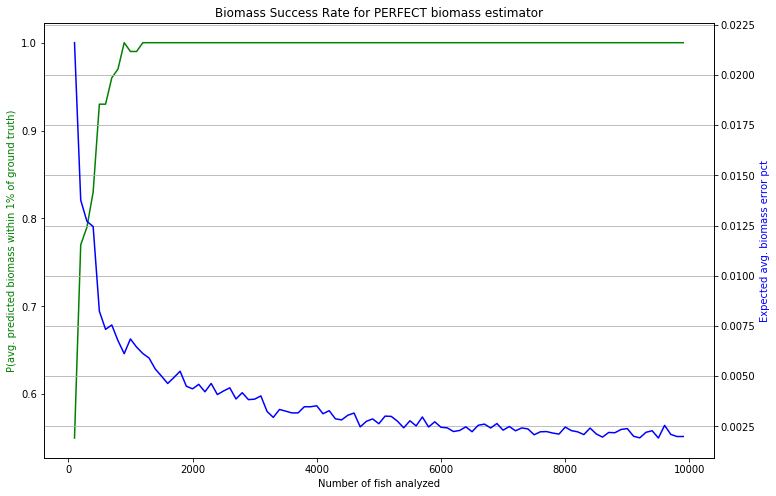

In [159]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax1.plot(sample_sizes, within_1_pct_freqs, 'g-')
ax2.plot(sample_sizes, avg_population_err_pcts, 'b-')

ax1.set_xlabel('Number of fish analyzed')
ax1.set_ylabel('P(avg. predicted biomass within 1% of ground truth)', color='g')
ax2.set_ylabel('Expected avg. biomass error pct', color='b')

plt.title('Biomass Success Rate for PERFECT biomass estimator')
plt.grid()
plt.show()